# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [415]:
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [416]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,46,709,43,182,42,118,247,4,5,0,1
2236,1946,PhD,Together,64014.0,2,56,406,0,30,0,0,8,5,7,0,1
2237,1981,Graduation,Divorced,56981.0,0,91,908,48,217,32,12,24,13,6,0,0
2238,1956,Master,Together,69245.0,0,8,428,30,214,80,30,61,10,3,0,1


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [418]:
df.isnull().sum()

Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
WebPurchases          0
dtype: int64

In [419]:
##São poucos dados nulos, então podemos descartar as linhas com dados faltantes
df = df.dropna()

In [420]:
df.isnull().sum()

Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumStorePurchases    0
NumWebVisitsMonth    0
Complain             0
WebPurchases         0
dtype: int64

In [421]:
print(f"Total de categorias em Marital_Status:\n{df["Marital_Status"].value_counts()}")
print()
print(f"Total de categorias em Education:\n{df["Education"].value_counts()}")

Total de categorias em Marital_Status:
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Total de categorias em Education:
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [422]:
df = df.copy()

In [423]:
##Ajustando categorias

##Total de gastos nos itens de consumo
gasto_cols = [col for col in df.columns if col.startswith("Mnt")]
df.loc[:,"Spent"] = df[gasto_cols].sum(axis=1)
df.drop(columns=gasto_cols, inplace=True)

# Mapeando Estado Civil
mapa_estado_civil = {
    "Single": 0,
    "Divorced": 0,
    "Married": 1,
    "Together": 1,
    "Widow": 0,
    "Alone": 0,
    "Absurd": 0,
    "YOLO": 0
}

df.loc[:,"Marital_Status"] = df["Marital_Status"].map(mapa_estado_civil)

# Mapeando Educação
mapa_educacao = {
    "Basic": 0,
    "2n Cycle": 0,
    "Graduation": 1,
    "Master": 2,
    "PhD": 2
}

df.loc[:,"Education"] = df["Education"].map(mapa_educacao)


In [424]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Spent
0,1957,1,0,58138.0,0,58,4,7,0,1,1617
1,1954,1,0,46344.0,1,38,2,5,0,0,27
2,1965,1,1,71613.0,0,26,10,4,0,1,776
3,1984,1,1,26646.0,1,26,4,6,0,0,53
4,1981,2,1,58293.0,1,94,6,5,0,1,422


In [425]:
df.describe()

,Year_Birth,Income,Kidhome,Recency,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,49.012635,5.800993,5.319043,0.009477,0.504513,607.075361
std,11.985554,25173.076661,0.536896,28.948352,3.250785,2.425359,0.096907,0.500092,602.900476
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1959.000000,35303.000000,0.000000,24.000000,3.000000,3.000000,0.000000,0.000000,69.000000
50%,1970.000000,51381.500000,0.000000,49.000000,5.000000,6.000000,0.000000,1.000000,396.500000
75%,1977.000000,68522.000000,1.000000,74.000000,8.000000,7.000000,0.000000,1.000000,1048.000000
max,1996.000000,666666.000000,2.000000,99.000000,13.000000,20.000000,1.000000,1.000000,2525.000000


### Pelo descbribe, podemos ver que existe alguns outliers, principalmente na coluna "Income" e "Year_Birth"

Scatterplot de variáveis que chamaram atenção


<Figure size 640x480 with 0 Axes>

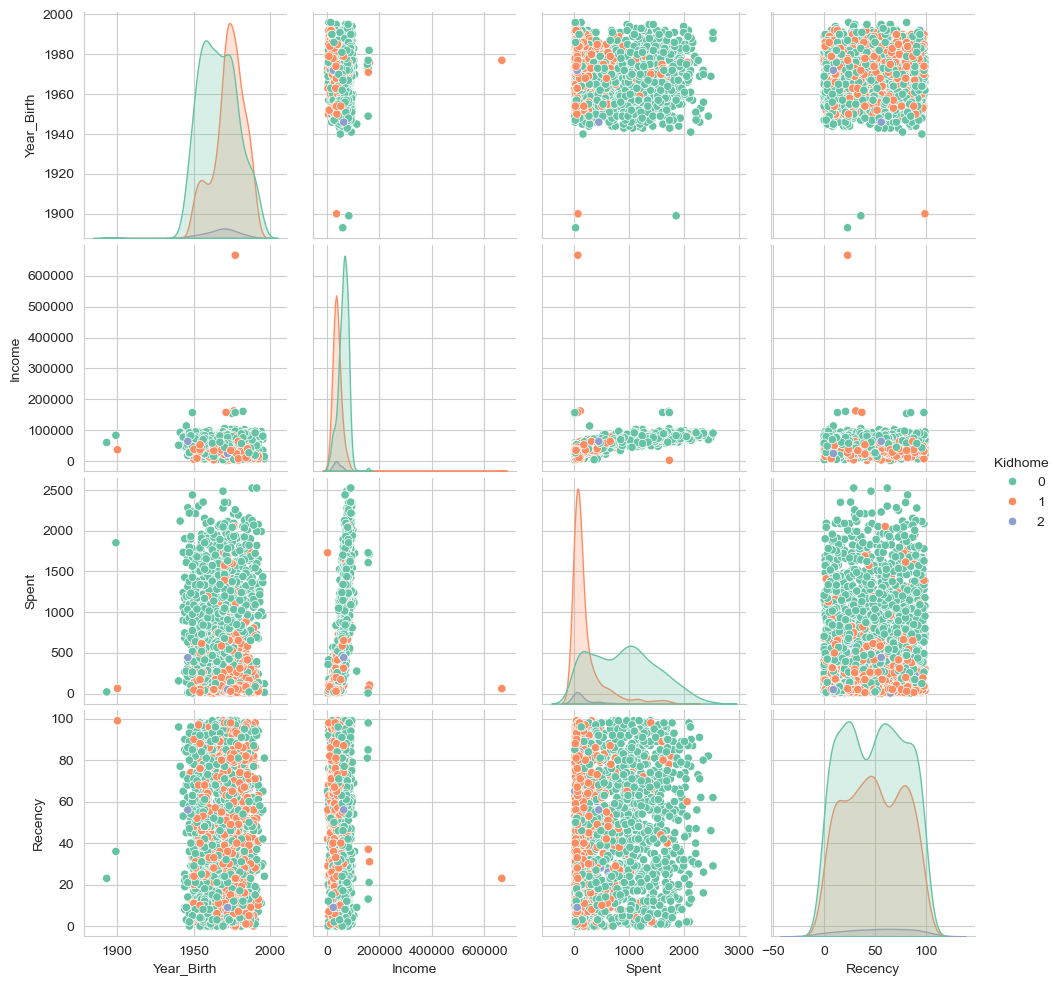

In [426]:
#Scatterplot de variáveis que chamaram atenção
colunas = [ "Year_Birth", "Income", "Spent", "Recency", "Kidhome"]
print("Scatterplot de variáveis que chamaram atenção")
plt.figure()
sns.pairplot(df[colunas], hue= "Kidhome", palette="Set2", diag_kind="kde")
plt.show()

### Agora fica mais evidente que há, de fato, outliers nas colunas `Year_Birth` e `Income`. Diante disso, optarei por removê-los.

In [427]:
print(f"Tamanho do dataset antes da remoção dos outliers: {len(df)}")

Tamanho do dataset antes da remoção dos outliers: 2216


In [428]:
# Filtros para remover todos clientes que nasceram antes de 1925 e quem tem renda maior que 140k
df = df[(df["Year_Birth"]>1925)].copy()
df = df[(df["Income"]<140000)].copy()

In [429]:
print(f"Tamanho do dataset após remoção dos outliers: {len(df)}")

Tamanho do dataset após remoção dos outliers: 2205


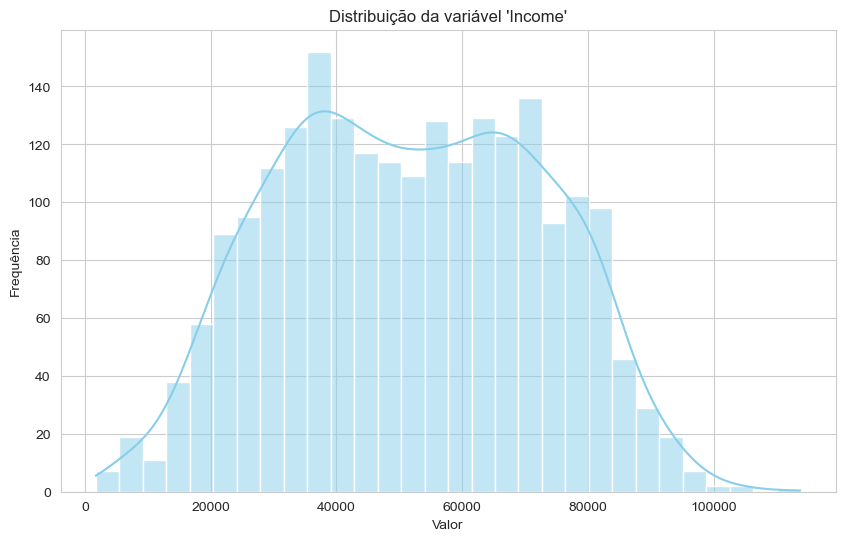

In [430]:
income = df["Income"]

plt.figure(figsize=(10, 6))

# Histograma + curva de densidade
sns.histplot(income, kde=True, bins=30, color='skyblue')

plt.title("Distribuição da variável 'Income'")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

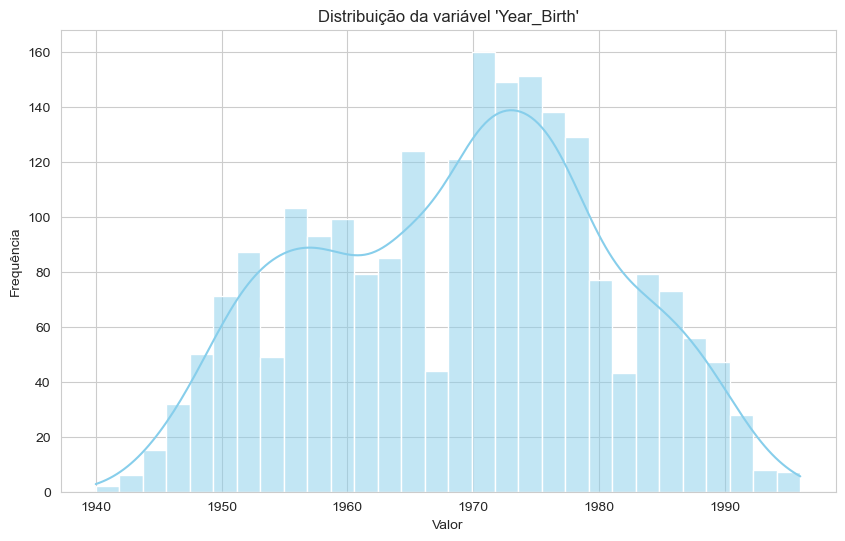

In [431]:
Year_birth = df["Year_Birth"]

plt.figure(figsize=(10, 6))

# Histograma + curva de densidade
sns.histplot(Year_birth, kde=True, bins=30, color='skyblue')

plt.title("Distribuição da variável 'Year_Birth'")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Podemos ver que não haverá tanto impacto na quantidade de dados perdidos, e a distribuição dos dados está muito mais uniforme após a remoção dos outliers.

In [432]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Recency', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
       'WebPurchases', 'Spent'],
      dtype='object')

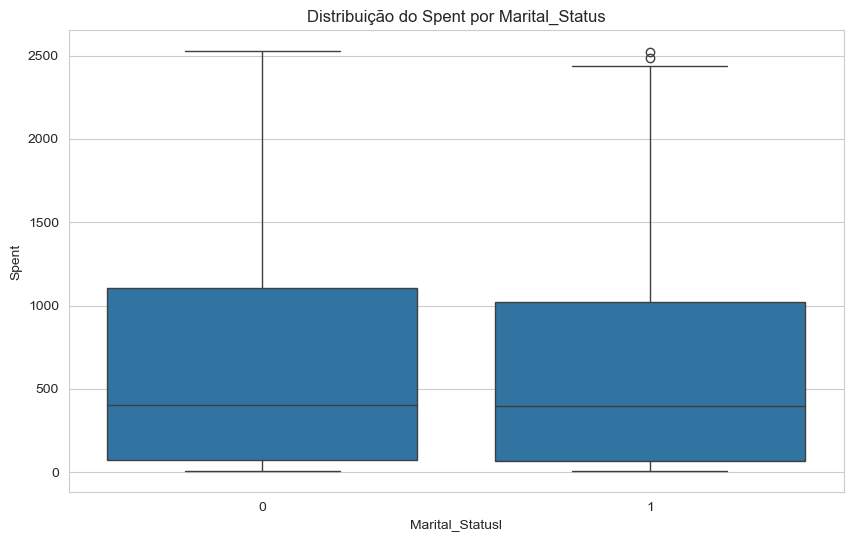

In [433]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marital_Status', y='Spent')
plt.title("Distribuição do Spent por Marital_Status")
plt.xlabel("Marital_Statusl")
plt.ylabel("Spent")
plt.show()

### Embora a diferença não seja expressiva, observa-se que pessoas solteiras tendem a apresentar um gasto ligeiramente superior em comparação às casadas.

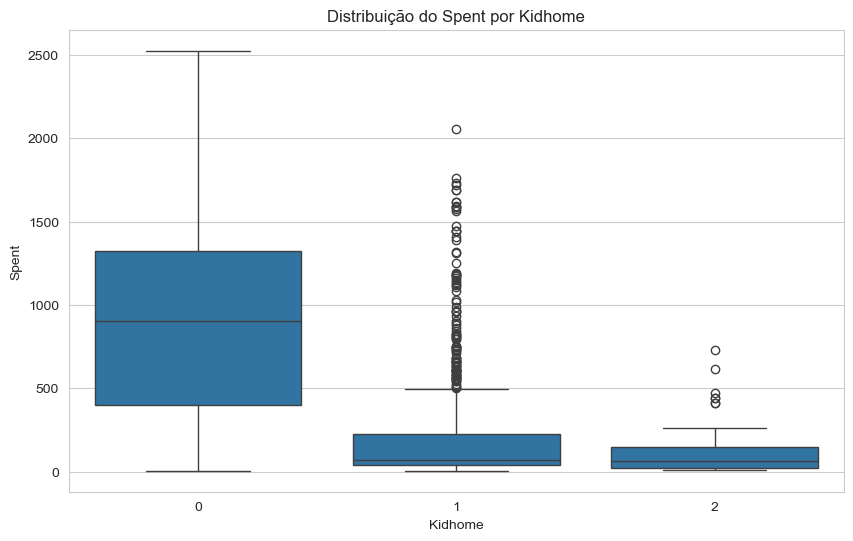

In [434]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Kidhome', y='Spent')
plt.title("Distribuição do Spent por Kidhome")
plt.xlabel("Kidhome")
plt.ylabel("Spent")
plt.show()

### Clientes que não possuem filhos, seja crianças ou adolescentes, tendem a apresentar um nível de gasto mais elevado em comparação aos que têm filhos.

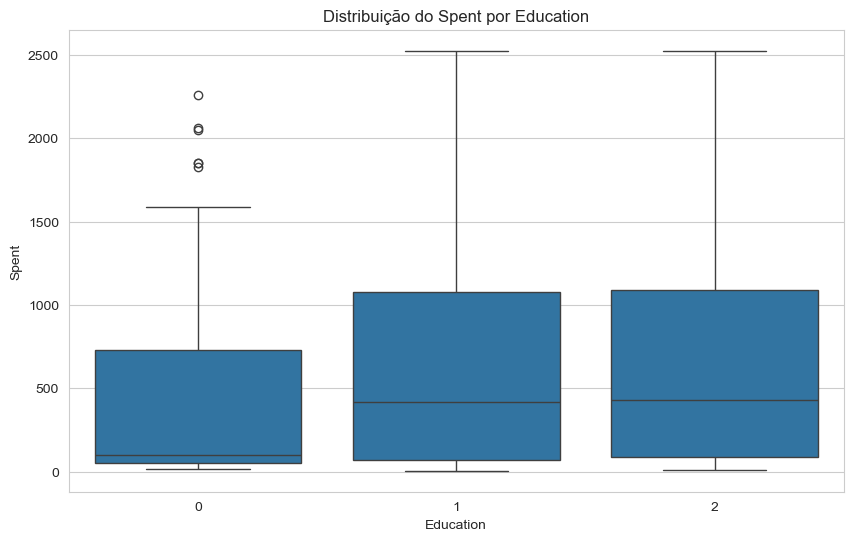

In [435]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='Spent')
plt.title("Distribuição do Spent por Education")
plt.xlabel("Education")
plt.ylabel("Spent")
plt.show()

### Aqui podemos observar que pessoas com maior nível de educação tendem a gastar mais. Isso provavelmente está relacionado ao fato de que, conforme o nível educacional aumenta, o salário também tende a ser mais elevado, permitindo um maior poder de consumo.

In [436]:
fig = px.scatter(df, x='NumWebVisitsMonth', y='Spent',
                 trendline='ols',  # linha de tendência
                 title='Dispersão entre NumWebVisitsMonth e Spent',
                 labels={'NumWebVisitsMonth': 'NumWebVisitsMonth', 'Spent': 'Spent'})

fig.show()

### Há uma tendência de que, conforme o número de visitas ao site da empresa aumenta, o valor gasto pelos clientes diminui.

In [437]:
fig = px.scatter(df, x='Income', y='Spent',
                 trendline='ols',  # linha de tendência
                 title='Dispersão entre Income e Spent',
                 labels={'Income': 'Income', 'Spent': 'Spent'})

fig.show()

### Observa-se uma relação positiva clara entre renda e gasto: à medida que o salário aumenta, o valor gasto pelo cliente também tende a aumentar.

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








<Axes: >

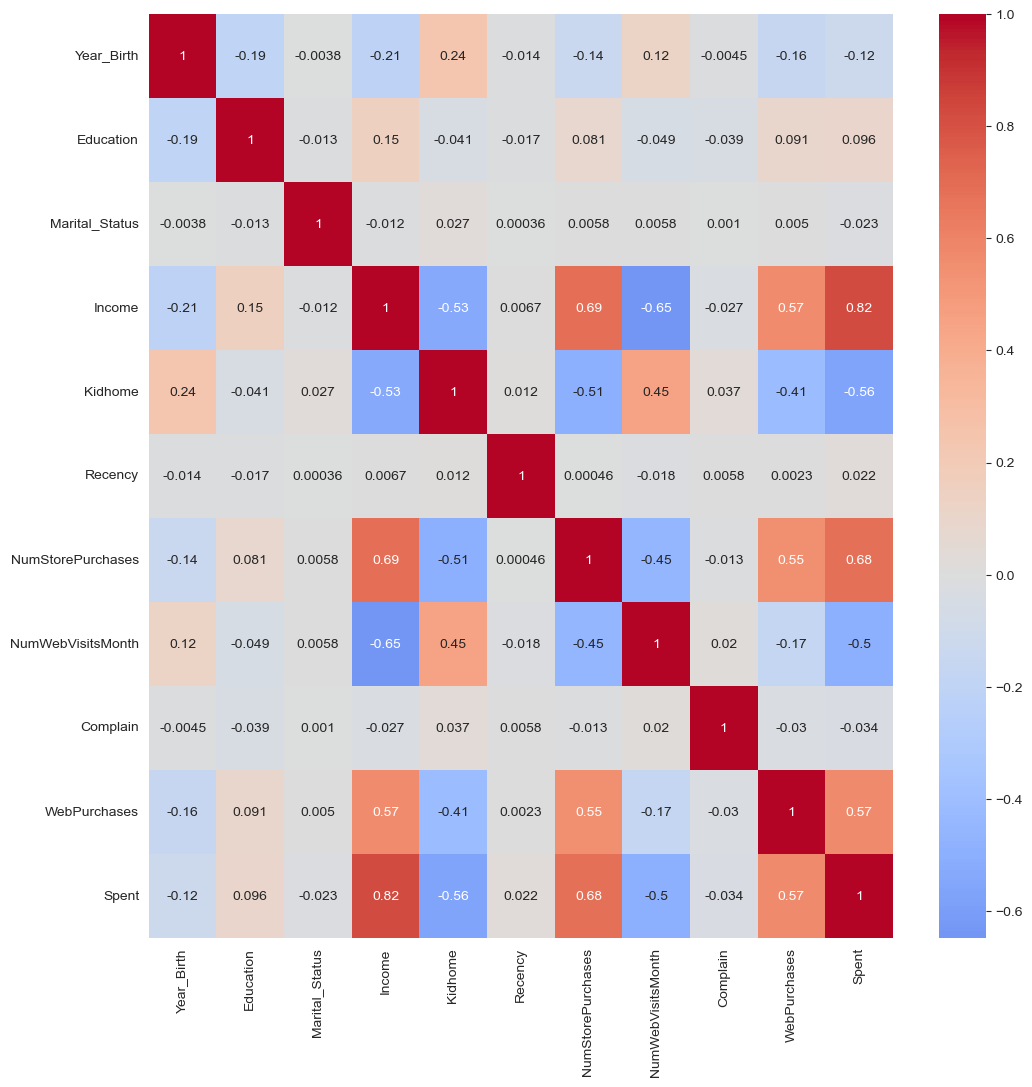

In [ ]:
## Agora vamos avaliar a correlação entre as variáveis
corrmat = df.corr()
plt.figure(figsize=(12, 12))  
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0)

In [439]:
# Copia do ds
df = df.copy()
# dropando colunas que não são relevantes para o modelo
cols_del = ['Complain','Marital_Status','Recency']
df = df.drop(cols_del, axis=1)

In [440]:
df.head()

,Year_Birth,Education,Income,Kidhome,NumStorePurchases,NumWebVisitsMonth,WebPurchases,Spent
0,1957,1,58138.0,0,4,7,1,1617
1,1954,1,46344.0,1,2,5,0,27
2,1965,1,71613.0,0,10,4,1,776
3,1984,1,26646.0,1,4,6,0,53
4,1981,2,58293.0,1,6,5,1,422


In [441]:
X = df.drop(columns=['WebPurchases'])
y = df['WebPurchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [442]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (1764, 7)
Tamanho de X_test: (441, 7)
Tamanho de y_train: (1764,)
Tamanho de y_test: (441,)


In [443]:
#Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [444]:
X_train.head()

,Year_Birth,Education,Income,Kidhome,NumStorePurchases,NumWebVisitsMonth,Spent
1070,1971,2,32892.0,1,3,8,46
1993,1958,1,94472.0,0,5,5,1691
1412,1969,2,43142.0,1,2,7,20
1665,1985,0,41473.0,1,3,7,76
1678,1976,2,49544.0,1,8,7,404


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [445]:
#Regressão Logística
logistic= LogisticRegression(random_state=42, max_iter=1000)

In [446]:
# Treinando o modelo de Regressão Logística com os dados de treino
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [447]:
y_pred_log = logistic.predict(X_test)

In [448]:
relatorio = classification_report(y_test, y_pred_log)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       214
           1       0.87      0.86      0.87       227

    accuracy                           0.86       441
   macro avg       0.86      0.86      0.86       441
weighted avg       0.86      0.86      0.86       441



In [449]:
##Random Forest
randon_forest = RandomForestClassifier(random_state=42)

In [450]:
randon_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [451]:
y_pred_rf = randon_forest.predict(X_test)

In [452]:
relatorio = classification_report(y_test, y_pred_rf)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       214
           1       0.93      0.93      0.93       227

    accuracy                           0.93       441
   macro avg       0.93      0.93      0.93       441
weighted avg       0.93      0.93      0.93       441



# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [455]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Matriz de Confusão Regressão Lógistica:\n", conf_matrix)

Matriz de Confusão Regressão Lógistica:
 [[184  30]
 [ 31 196]]


In [456]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusão Randon Forest:\n", conf_matrix)

Matriz de Confusão Randon Forest:
 [[198  16]
 [ 16 211]]


## Comparação de Desempenho dos Modelos: Regressão Logística vs Random Forest

### Métricas de Avaliação

| Métrica       | Regressão Logística | Random Forest |
|---------------|---------------------|---------------|
| **Acurácia**  | 0.86                | **0.93**      |
| **Precisão**  | 0.86 – 0.87         | **0.93 – 0.93** |
| **Recall**    | 0.86 – 0.86         | **0.93 – 0.93** |
| **F1-score**  | 0.86 – 0.87         | **0.93 – 0.93** |

O modelo **Random Forest** apresentou métricas superiores em acurácia, precisão, recall e F1-Score em relação à **Regressão Logística**, indicando melhor desempenho geral na tarefa de classificação.

### Matriz de Confusão

#### Regressão Logística:

[[184  30]
[ 31 196]]
→ 61 erros (30 + 31)

#### Random Forest:

[[198  16]
[ 16 211]]
→ 32 erros (16 + 16)

Random Forest comete bem menos erros em relação a Regressão Logística.

Ou seja, podemos concluir que para essa base de dados utilizando os critérios avaliados anteriormente o modelo Random Forest apresentou um desempenho melhor que a Regressão Logística.
Sendo assim o Random Forest é o modelo mais indicado para realizar previsões para esse caso específico.